<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab-7:-Optimization-and-learning" data-toc-modified-id="Lab-7:-Optimization-and-learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Lab 7: Optimization and learning</strong></a></span></li><li><span><a href="#Abstract" data-toc-modified-id="Abstract-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Abstract</strong></a></span></li><li><span><a href="#Set-up-environment" data-toc-modified-id="Set-up-environment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Set up environment</strong></a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Introduction</strong></a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Methods</strong></a></span><ul class="toc-item"><li><span><a href="#Gradient-descent-method-in-$R^n$" data-toc-modified-id="Gradient-descent-method-in-$R^n$-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Gradient descent method in $R^n$</a></span></li><li><span><a href="#Augmented-Lagrangian-method-in-$R^n$" data-toc-modified-id="Augmented-Lagrangian-method-in-$R^n$-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Augmented Lagrangian method in $R^n$</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>Results</strong></a></span><ul class="toc-item"><li><span><a href="#Gradient-descent-method-in-$R^n$" data-toc-modified-id="Gradient-descent-method-in-$R^n$-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Gradient descent method in $R^n$</a></span></li><li><span><a href="#Augmented-Lagragian-method-in-$R^n$" data-toc-modified-id="Augmented-Lagragian-method-in-$R^n$-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Augmented Lagragian method in $R^n$</a></span></li></ul></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Discussion</strong></a></span></li></ul></div>

<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/Volkaa/Lab-7/Volkaa_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Optimization and learning**
**Matthis Manthe**

# **Abstract**

In this final lab, we implement algorithms used in the optimization and the learning fields. We focus on gradient decent method, and an implementation of newton's method to find the minimum of a function, in a context of unconstrained search. We test and show the convergence of these two functions.

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [1]:
"""This program uses a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [1]:
# Load neccessary modules.
# from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

We implement in this last lab the famous gradient descent method first, and then newton's method for function minimization. All the methods and algorithms are taken from the seventh part of the course : [DD2363 course content.](https://kth.instructure.com/courses/17068/files/2669101?module_item_id=201495)

# **Methods**

## Gradient descent method in $R^n$

This is an implementation of the gradient descent method. Starting from a fixed point x0, we compute at each iteration the gradient of the function to minimize at the current point, and go in the opposite direction.

In input, function must have signature function(list x) returning function(x), x0 is the starting point as a numpy array, h is the size of the interval used to approximate the derivatives in the compute_gradient function, TOL is the usual tolerance limit, stop condition of our algorithm, and alpha is the "learning rate".

This function outputs an approximation of the minimum of the function.

In [2]:
def compute_gradient(function, x, h):
    grad = []
    for i in range(len(x)):
        increment = np.array([h if j==i else 0 for j in range(len(x))])
        grad.append((function(x+increment/2) - function(x-increment/2))/h)
    return np.array(grad)

In [3]:
def grad(function, x0, h, TOL, alpha):
    result = [x0]
    Df = compute_gradient(function, x0, h)
    while (np.linalg.norm(Df) > TOL):
        result.append(result[-1] -alpha*Df)
        Df = compute_gradient(function, result[-1], h)
    return np.array(result)

## Augmented Lagrangian method in $R^n$

This is an implementation of Newton's method. Starting from a fixed point x0, we compute at each iteration the gradient and the hessian matrix of the function to minimize at the current point, and we apply the formula : $x^{(k+1)} = x^{(k)} - \alpha * Hf(x^{(k)})^{-1}*Df(x^{(k)})$.

In input, function must have signature function(list x) returning function(x), x0 is the starting point as a numpy array, h is the size of the interval used to approximate the derivatives in the compute_gradient function, TOL is the usual tolerance limit, stop condition of our algorithm, and alpha is the "learning rate".

This function outputs an approximation of the minimum of the function.

In [40]:
def compute_hessian(function, x, h):
    hessian = []
    for i in range(len(x)):
        increment = np.array([h if j==i else 0 for j in range(len(x))])
        hessian.append((compute_gradient(function, x+increment/2, h/10)-compute_gradient(function, x-increment/2, h/10))/h)
    return np.array(hessian)

In [62]:
def newton_method(function, x0, h, TOL, alpha):
    result = [x0]
    Df = compute_gradient(function, x0, h)
    Hf = compute_hessian(function, x0, h)
    while (np.linalg.norm(Df) > TOL):
        dx = np.linalg.solve(Hf, Df)
        result.append(result[-1] -alpha*dx)
        Df = compute_gradient(function, result[-1], h)
        Hf = compute_hessian(function, result[-1], h)
    return np.array(result)

# **Results**

## Gradient descent method in $R^n$

We test the implementation of the gradient descent with 2 functions. We compute the distance between the approximation and the exact solution. We also plot the approximation at each iteration of the function to show the convergence toward the minimum of the functions.

In [51]:
def sum_square_function(x):
    return np.dot(x,x)

In [52]:
def strange_function(x):
    return np.sin(x[0]/2)*np.cos(x[1]/2)

In [53]:
def test_gradient_descent(function, x0, h, TOL, alpha):
    print("Function : ", function.__name__)
    print("\nInitial point : ", x0)
    print("\nStep size coef : ", alpha)
    res = grad(function, x0, h, TOL, alpha)
    print("\nExact solution : ", np.zeros(len(x0)))
    print("\nComputed solution : ", res[-1])
    print("\nDistance : ", np.linalg.norm(np.zeros(len(x0))-res[-1]))

In [54]:
test_gradient_descent(sum_square_function, np.array([-1,-1]), 0.05, 1e-4, 0.1)

Function :  sum_square_function

Initial point :  [-1 -1]

Step size coef :  0.1

Exact solution :  [0. 0.]

Computed solution :  [-3.48449144e-05 -3.48449144e-05]

Distance :  4.927815048560762e-05


In [55]:
test_gradient_descent(strange_function, np.array([-1,-1]), 0.05, 1e-4, 0.1)

Function :  strange_function

Initial point :  [-1 -1]

Step size coef :  0.1

Exact solution :  [0. 0.]

Computed solution :  [-3.14125021e+00 -1.88013804e-04]

Distance :  3.1412502177645805


In [56]:
def show_convergence_gradient_descent(function, x0, h, TOL, alpha):
    
    x = np.linspace(-6, 6, 60)
    y = np.linspace(-6, 6, 60)

    X, Y = np.meshgrid(x, y)
    # Z = np.array([function(np.array([X[i],Y[i]])) for i in range(len(X))])
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = function(np.array([X[i,j], Y[i,j]]))

    fig = plt.figure(figsize=[12,12])
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 80, cmap='binary')
    
    result = grad(function, x0, h, TOL, alpha)
    values = [function(np.array([result[i,0], result[i,1]])) for i in range(len(result))]
    ax.scatter(result[:,0], result[:,1], values, s=80, c='r')



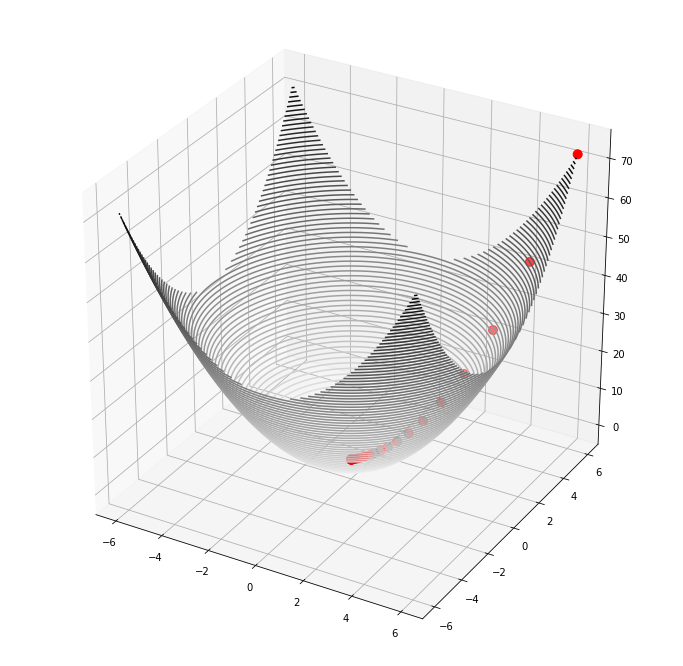

In [57]:
show_convergence_gradient_descent(sum_square_function, np.array([6,6]), 0.05, 1e-3, 0.1)

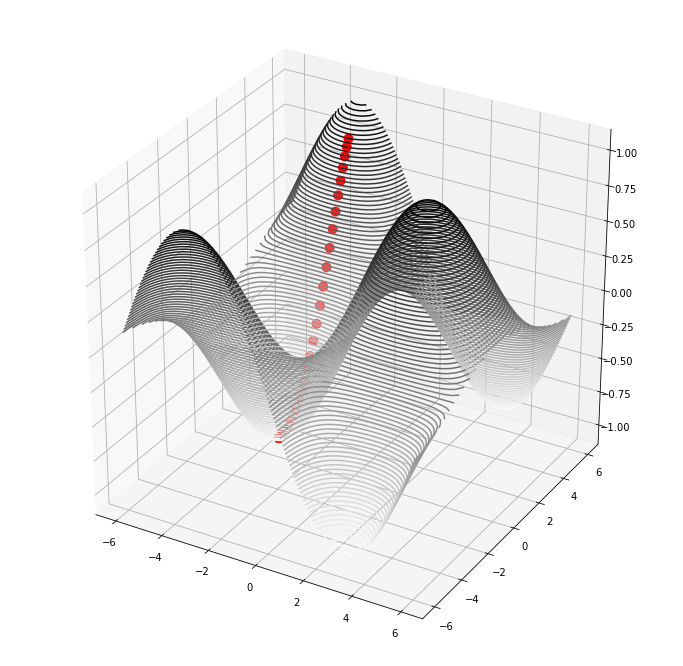

In [58]:
show_convergence_gradient_descent(strange_function, np.array([-3,5]), 0.05, 1e-4, 0.5)

## Augmented Lagragian method in $R^n$

We test the implementation of Newton's method with 2 functions. We compute the distance between the approximation and the exact solution. We also plot the approximation at each iteration of the function to show the convergence toward the minimum of the functions.

In [59]:
def test_newton(function, x0, h, TOL, alpha):
    print("Function : ", function.__name__)
    print("\nInitial point : ", x0)
    print("\nStep size coef : ", alpha)
    res = newton_method(function, x0, h, TOL, alpha)
    print("\nExact solution : ", np.zeros(len(x0)))
    print("\nComputed solution : ", res[-1])
    print("\nDistance : ", np.linalg.norm(np.zeros(len(x0))-res[-1]))

In [63]:
test_newton(sum_square_function, np.array([1,-0.5]), 0.05, 1e-4, 0.1)

Function :  sum_square_function

Initial point :  [ 1.  -0.5]

Step size coef :  0.1

Exact solution :  [0. 0.]

Computed solution :  [ 4.0483766e-05 -2.0241883e-05]

Distance :  4.526222640613725e-05


In [64]:
def show_convergence_newton(function, x0, h, TOL, alpha):
    
    x = np.linspace(-6, 6, 60)
    y = np.linspace(-6, 6, 60)

    X, Y = np.meshgrid(x, y)
    # Z = np.array([function(np.array([X[i],Y[i]])) for i in range(len(X))])
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = function(np.array([X[i,j], Y[i,j]]))

    fig = plt.figure(figsize=[12,12])
    ax = plt.axes(projection='3d')
    ax.contour3D(X, Y, Z, 80, cmap='binary')
    
    result = newton_method(function, x0, h, TOL, alpha)
    values = [function(np.array([result[i,0], result[i,1]])) for i in range(len(result))]
    ax.scatter(result[:,0], result[:,1], values, s=80, c='r')



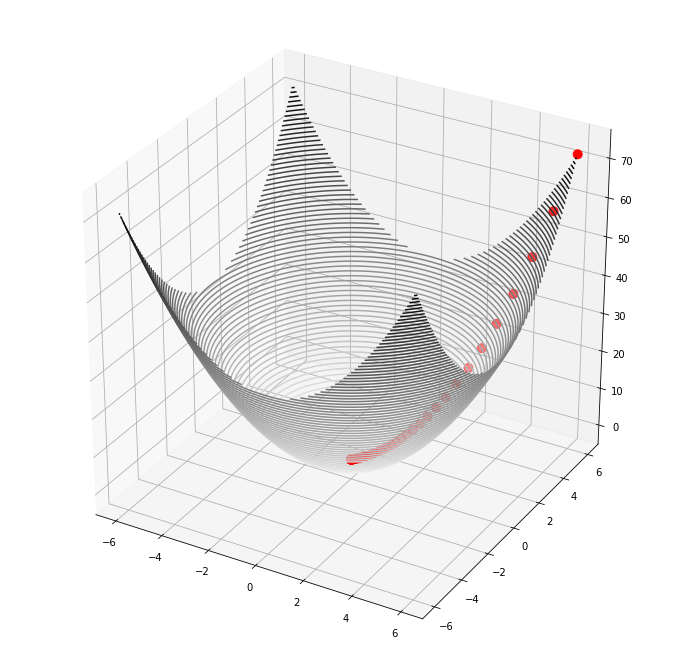

In [65]:
show_convergence_newton(sum_square_function, np.array([6,6]), 0.05, 1e-3, 0.1)

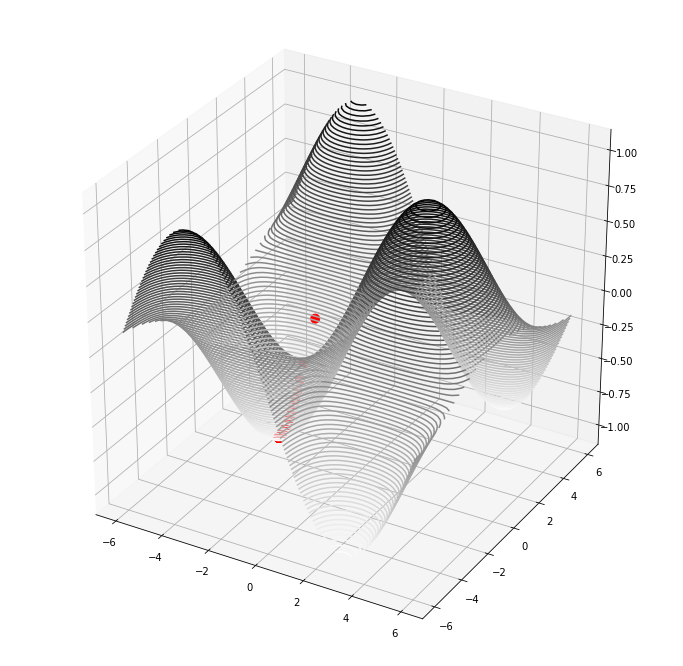

In [68]:
show_convergence_newton(strange_function, np.array([-3,2.5]), 0.05, 1e-4, 0.1)

# **Discussion**

Both of these methods are used in the same context of an unconstrained minimization of a function. It can happen that the hessian matrix is singular at some point during Newton's method, which is a flaw, but this method should overall be faster than the simple gradient descent.